# Feature Engineering - Handling Outliers

### Which Machine Learning Models Are Sensitive To Outliers?


1)  Linear Regression------------------Sensitive To Outliers

2)  Polynomial Regression--------------Sensitive To Outliers

3)  Ridge and Lasso Regression---------Sensitive To Outliers

4)  Decision Tree Regressor------------Not Sensitive

5)  Logistic Regression----------------Sensitive To Outliers

6)  KNN--------------------------------Sensitive To Outliers

7)  Naivye Bayes Classifier------------Not Sensitive 

8)  SVM--------------------------------Not Sensitive  

9)  Decision Tree Classifier-----------Not Sensitive

10) Ensemble(RF,AB,GB,XgBoost)---------Not Sensitive

11) Kmeans-----------------------------Sensitive

12) Hierarichal------------------------Sensitive 

13) PCA--------------------------------Sensitive

14) Neural Networks--------------------Sensitive


## If Data or column is Guassian distributed

##### If column follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers using below code

uppper_boundary = df['col_name'].mean() + 3* df['col_name'].std()

lower_boundary = df['col_name'].mean() - 3 * df['col_name'].std() 

print(lower_boundary)

print(uppper_boundary)

### Removing the ouliers values and replacing that with upper and lower boundaries

data = df.copy()

data.loc[ data['col_name'] >= uppper_boundary, 'col_name'] = uppper_boundary

data.loc[ data['col_name'] <= lower_boundary, 'col_name'] = lower_boundary

## If Data or column is Left or Right Skewed

#### If column is left or right skewed  we will calculate the boundaries which differentiates the outliers using below code

###### Here you can 

* IQR * 1.5 ---to remove Normal outliers  
* IQR * 3   ---to remove Extreme outliers

lower_bridge = df['col_name'].quantile(0.25) - (IQR * 3)

upper_bridge = df['col_name'].quantile(0.75) + (IQR * 3)

print(lower_bridge)

print(upper_bridge)

### Removing the ouliers values and replacing that with upper and lower boundaries

data = df.copy()

data.loc[ data['col_name'] >= upper_bridge, 'col_name'] = upper_bridge

data.loc[ data['col_name'] <= lower_bridge, 'col_name'] = lower_bridge

# To check how data is distributed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.rename(columns = {'Age':'col_name'}, inplace = True)

c:\users\manoj\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='col_name', ylabel='Density'>

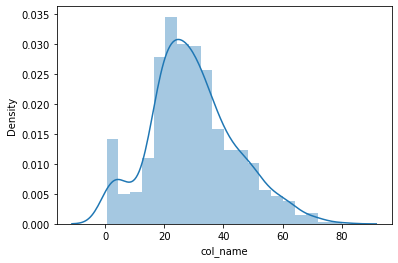

In [5]:
sns.distplot(df['col_name'])

Text(0, 0.5, 'ylabel')

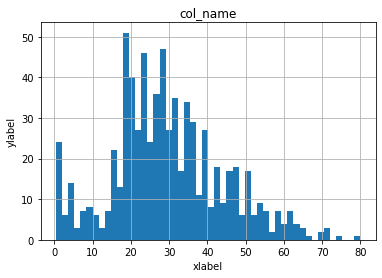

In [6]:
figure = df['col_name'].hist(bins=50)

figure.set_title('col_name')
figure.set_xlabel('xlabel')
figure.set_ylabel('ylabel')

# To check column has outlier or not

<AxesSubplot:>

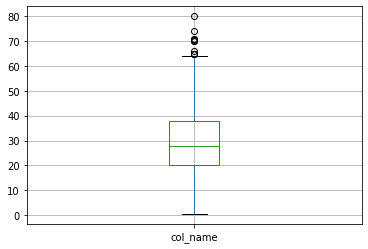

In [7]:
df.boxplot(column='col_name')

c:\users\manoj\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='col_name'>

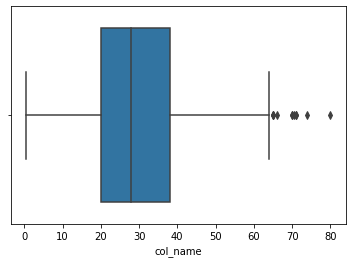

In [8]:
# or
sns.boxplot(df['col_name'])

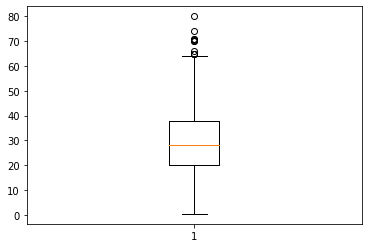

In [9]:
# or
# To use plt you need to first drop or replace nan values
plt.boxplot(df['col_name'].dropna())
plt.show()

## Dynamic way

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

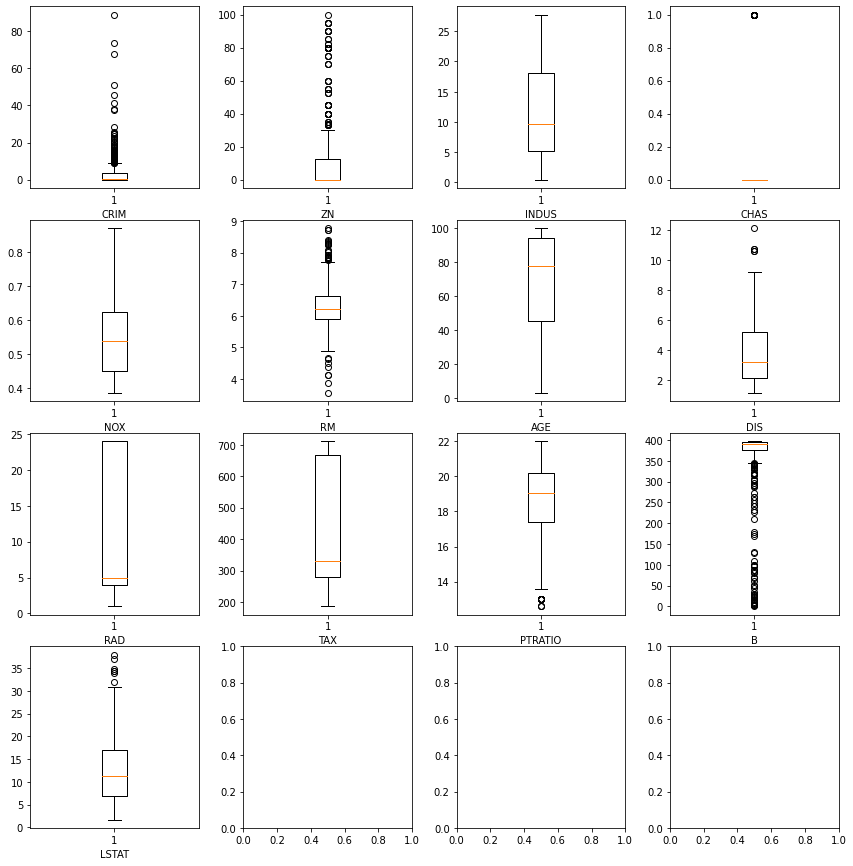

In [12]:
fig, ax = plt.subplots(4,4, figsize = (12,12))
plt.tight_layout() # this is just to ge 
columns = X.columns
col = 0

for i in range(0, 4):
    for j in range(0, 4):
        if col < len(columns):
            ax[i, j].boxplot(X[columns[col]])
#             ax[i, j].hist(X[columns[col]])
            ax[i, j].set_xlabel(columns[col])
            col = col +1 

### We can use feature_engine module also to remove the outliers

* same as we seen in handling nan values

* To know more details : https://feature-engine.readthedocs.io/en/latest/outliers/index.html


## 1) Winsorizer method

* It works only with numerical variables.

from feature_engine.outliers import Winsorizer


capper = Winsorizer(capping_method='gaussian', tail='right', fold=3, variables=['col_name', 'col_name'], missing_values = 'raise')

###### if you wanto to directly fit to the data

capper.fit(df)

###### if you want to fit the data to both tainning and testing

capper.fit(X_train)

###### transform the data

train_t= capper.transform(X_train)

test_t= capper.transform(X_test)

capper.right_tail_caps_

#### Info:

1) capping_method can be 'gaussian', 'iqr', 'quantiles'

    a) Gaussian limits: 
          * right tail: mean + 3* std
          * left tail: mean - 3* std
    b) IQR limits:
          *  right tail: 75th quantile + 3* IQR
          * left tail: 25th quantile - 3* IQR
    c) percentiles or quantiles:
          * right tail: 95th percentile
          * left tail: 5th percentile
          
2) tail : Whether to cap outliers on the right, left or both tails of the distribution (‘left’, ‘right’ or ‘both’.)

3) Fold : How far out to to place the capping values.

      * 2 or 3 for the gaussian approximation
      * 1.5 or 3 for the IQR proximity rule
      * If capping_method=’quantile’, then ‘fold’ indicates the percentile. So if fold=0.05, the limits will be the 95th and 5th percentiles
      
4) missing_values: (default=’raise’) Indicates if missing values should be ignored or raised. (’raise’, 'ignore')

## 2) OutlierTrimmer

* Works same like Winsorizer method, nothing change

* It works only with numerical variables.

* from feature_engine.outliers import OutlierTrimmer

* capper = OutlierTrimmer(capping_method='gaussian', tail='right', fold=3, variables=None, missing_values='raise'

## 3) ArbitraryOutlierCapper

* The ArbitraryOutlierCapper() caps the maximum or minimum values of a variable at an arbitrary value indicated by the user.

from feature_engine.outliers import ArbitraryOutlierCapper


capper = ArbitraryOutlierCapper(max_capping_dict={'age': 50, 'fare': 200}, min_capping_dict=None)

###### if you wanto to directly fit to the data

capper.fit(df)

###### if you want to fit the data to both tainning and testing

capper.fit(X_train)

###### transform the data

train_t= capper.transform(X_train)

test_t= capper.transform(X_test)

capper.right_tail_caps_

#### Info:

1) max_capping_dict: dictionary, default=None

      * Dictionary containing the user specified capping values for the right tail of the distribution of each variable (maximum values).
          
2) min_capping_dict: dictionary, default=None

      * Dictionary containing user specified capping values for the eft tail of the distribution of each variable (minimum values). 

3) missing_valuesstring, default=’raise’

     * Indicates if missing values should be ignored or raised. If missing_values='raise' the transformer will return an error if the training or  the datasets to transform contain missing values.